5-Year Emissions Prediction
2024: 504993.95
2025: 493690.83
2026: 482387.71
2027: 471084.59
2028: 459781.47


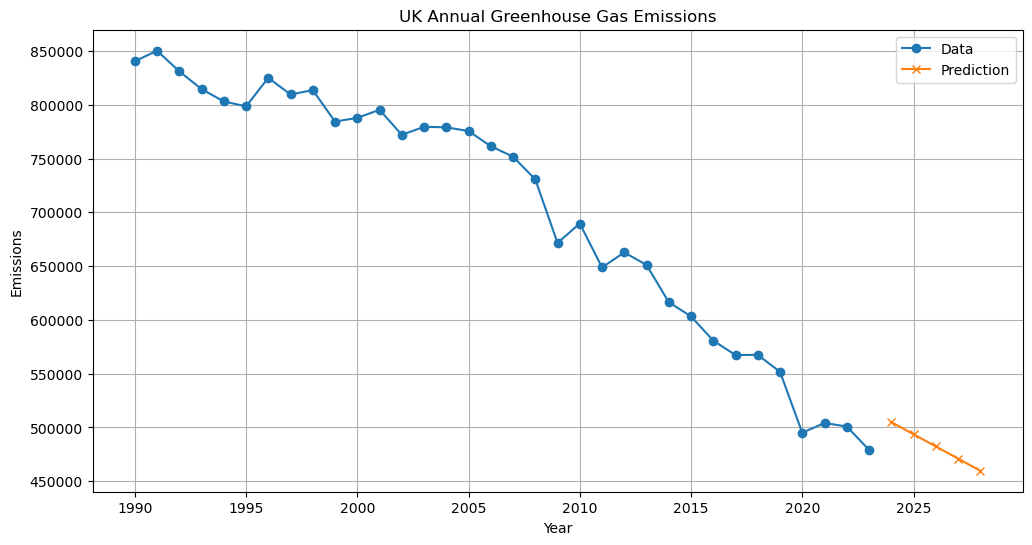

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Load the data
df = pd.read_excel("provisionalatmoshpericemissionsghg.xlsx", sheet_name="GHG total", header=6)

#Select and clean the required columns
data = df[["SIC code", "Total"]].drop(0)
data.columns = ["Year", "Total_Emissions"]
data = data.dropna()
data["Year"] = pd.to_numeric(data["Year"])
data["Total_Emissions"] = pd.to_numeric(data["Total_Emissions"])

#Variables
X = data["Year"].values.reshape(-1, 1)
y = data["Total_Emissions"].values

#Linear model
model = LinearRegression()
model.fit(X, y)

#Predict the next 5 years
last_year = int(data["Year"].max())
future_years = np.arange(last_year + 1, last_year + 6).reshape(-1, 1)
future_predictions = model.predict(future_years)

#Results
print("5-Year Emissions Prediction")
for year, pred in zip(future_years.flatten(), future_predictions):
    print(f"{year}: {pred:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(data["Year"], data["Total_Emissions"], marker="o", label="Data")
plt.plot(future_years, future_predictions, marker="x", label="Prediction")

plt.title("UK Annual Greenhouse Gas Emissions")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.grid(True)
plt.legend()
plt.show()